In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


csvfile = "Tweets.csv"
balancedfile = "BalancedUncleanFile.csv"
df = pd.read_csv(csvfile)#Pandas DataFrame is 2-D,tabular data structure with labeled rows and columns
df.info()

#counting total no. of records
totalPositiveRecords = len(df[df["airline_sentiment"] == "positive"])
totalNegativeRecords = len(df[df["airline_sentiment"] == "negative"])
totalNeutralRecords = len(df[df["airline_sentiment"] == "neutral"])
print("No of Positive= ", totalPositiveRecords) #2363
print("No of Negative= ",totalNegativeRecords)
print("No of Neutral = ", totalNeutralRecords)

#indices
negativeIndices = df[df['airline_sentiment'] == "negative"].index
positiveIndices = df[df['airline_sentiment'] == "positive"].index
neutralIndices = df[df['airline_sentiment'] == "neutral"].index

#randomaly selecting the records wrt sentiments
random_Positive_indices = np.random.choice(positiveIndices, totalPositiveRecords, replace=False)
random_Negative_indices = np.random.choice(negativeIndices, totalPositiveRecords, replace=False)
random_Neutral_indices = np.random.choice(neutralIndices, totalPositiveRecords, replace=False)

allIndices = np.concatenate([random_Positive_indices,random_Negative_indices,random_Neutral_indices])
df = df.iloc[allIndices] 
df.to_csv(balancedfile) #converting back to csv
print("A balanced *",balancedfile,"* file created")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
tweet_id                        14640 non-null int64
airline_sentiment               14640 non-null object
airline_sentiment_confidence    14640 non-null float64
negativereason                  9178 non-null object
negativereason_confidence       10522 non-null float64
airline                         14640 non-null object
airline_sentiment_gold          40 non-null object
name                            14640 non-null object
negativereason_gold             32 non-null object
retweet_count                   14640 non-null int64
text                            14640 non-null object
tweet_coord                     1019 non-null object
tweet_created                   14640 non-null object
tweet_location                  9907 non-null object
user_timezone                   9820 non-null object
dtypes: float64(2), int64(2), object(11)
memory usage: 1.7+ MB
No of Positive=  2363
No of 

In [2]:
import re, csv
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer


stopWordList = set(stopwords.words('english')) 
stemmer = PorterStemmer()
punctuations = "-?.!'"

tweetsData = []
sentiment = []
dict1 = {}
 
with open(balancedfile) as csvfile:
    data = csv.reader(csvfile, delimiter=',')
    i=0
    for row in data:
        data = row[11]
        senti = row[2]
        sentiment.append(senti)
        tokenArr = re.split('[(\[\]\+*:.!\,-?;)]', data)
#         tokenArr =  data.split()
        cleanTextList = []        
        for token in tokenArr:
            if not token in stopWordList:
                token = stemmer.stem(token) #stemming
                if token in punctuations:#replacing punctuations
                #print(token)
                    token = "<PUNCT>"
                else:
                    #token = re.sub('#[^\s]+',"<HASHTAG>",token)#replacing #hastage 
                    token = re.sub('@[^\s]+',"<USERNAME>",token)#replacing @username from token 
                    token = re.sub(r"http\S+", "<URL>", token)  #replacing url from token     
                    token = re.sub(r"\//\S+", "<URL>", token)  #replacing url from token like this: //t.co/mWpG7grEZP
                token = token.lower()

            cleanTextList.append(token)
            
        cleanText = ' '.join(cleanTextList)
        tweetsData.append(cleanText)
#         if(i >= 30):
#             break
#         i=1+1

    

# for i in tweetsData: print (i)
# print("balanced_clean created")     
# print('TWEETS:', tweetsData)
print("EOD")

EOD


In [3]:

wtr = csv.writer(open ('balanced_clean.csv', 'w'), delimiter=',', lineterminator='\n')
for i in range(1,7068) : 
    wtr.writerow ([sentiment[i], tweetsData[i]])
    
print("done")


done


In [4]:
#Splitting DataSet for Training and Testing
from sklearn.model_selection import train_test_split

targetSentiment = ["positive", "negative","neutral"]

X_train, X_test, Y_train, Y_test = train_test_split(tweetsData, sentiment, test_size =0.35)
#Convert a collection of text documents to a matrix of token counts
#Count Vectorizer ignores uni-character words as it has no information
countVector = CountVectorizer() 
vocab= countVector.fit(X_train)
termCountMatrix = countVector.transform(X_train)
print("running")
print("SHAPE:"+ str(termCountMatrix.shape)) #3 documents and 7 unique terms/vocab

#TFIDF
tfIdfTransformer = TfidfTransformer()
tfIdfTransformer.fit(termCountMatrix)#sorted in the order of Features array
#print("TFIDF:" + str(tfIdfTransformer.idf_))

tdIdfMatrix = tfIdfTransformer.transform(termCountMatrix)


# print("TFIDF:" + str(tdIdfMatrix.toarray()))


#------Training NB Model-----
model = MultinomialNB().fit(tdIdfMatrix,Y_train)


#------Testing NB Model-----
newVectorMatrix = countVector.transform(X_test)
newTFMatrix =  tfIdfTransformer.transform(newVectorMatrix)
predicted = model.predict(newTFMatrix)
print("PREDICT",predicted)

accuracy = metrics.accuracy_score(Y_test,predicted)
print("accuracy:", accuracy)
print(metrics.classification_report(Y_test, predicted, targetSentiment))

running
SHAPE:(4608, 7243)
PREDICT ['positive' 'positive' 'neutral' ... 'neutral' 'negative' 'neutral']
accuracy: 0.7103142626913779
              precision    recall  f1-score   support

    positive       0.79      0.72      0.75       865
    negative       0.66      0.83      0.73       814
     neutral       0.70      0.58      0.63       803

   micro avg       0.71      0.71      0.71      2482
   macro avg       0.72      0.71      0.71      2482
weighted avg       0.72      0.71      0.71      2482



In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

# vectorizer = TfidfVectorizer(min_df =2, max_df=0.5, ngram_range=(1,2))
vectorizer = TfidfVectorizer(ngram_range=(1,1))
# vectorizer = TfidfVectorizer(sublinear_tf=True, 
#                              smooth_idf = True,
#                              stop_words='english')

features = vectorizer.fit_transform(X_train)
feature_names = vectorizer.get_feature_names()
# print(vectorizer.get_feature_names())


In [6]:
testFeatures = vectorizer.transform(X_test)
# print(vectorizer.get_feature_names())

SHAPE: feature:(4608, 7243)featureTest:(2482, 7243)
SELECT K BEST, feature:(4608, 1000)featureTest:(2482, 1000)
PREDICT ['positive' 'positive' 'neutral' ... 'neutral' 'negative' 'neutral']
accuracy: 0.7159548751007252
              precision    recall  f1-score   support

    positive       0.80      0.74      0.77       865
    negative       0.70      0.76      0.73       814
     neutral       0.65      0.64      0.65       803

   micro avg       0.72      0.72      0.72      2482
   macro avg       0.72      0.72      0.71      2482
weighted avg       0.72      0.72      0.72      2482

[[644  96 125]
 [ 49 617 148]
 [115 172 516]]


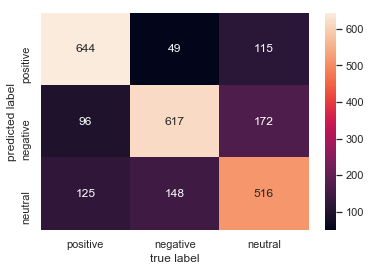

In [36]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

print("SHAPE: feature:"+ str(features.shape) + "featureTest:" + str(testFeatures.shape))

feature_names = vectorizer.get_feature_names()
ch2 = SelectKBest(chi2, k=1000)
X_train = ch2.fit_transform(features, Y_train)
X_test = ch2.transform(testFeatures);
selected_feature_names = [feature_names[i] for i in ch2.get_support(indices=True)]
# print(selected_feature_names);

print("SELECT K BEST, feature:"+ str(X_train.shape) + "featureTest:" + str(X_test.shape))

#------Training NB Model-----
model = MultinomialNB().fit(X_train,Y_train)

#------Testing NB Model-----
predicted = model.predict(X_test)
print("PREDICT",predicted)

accuracy = metrics.accuracy_score(Y_test,predicted)
print("accuracy:", accuracy)
print(metrics.classification_report(Y_test, predicted, targetSentiment))

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

ConMetrics = metrics.confusion_matrix(Y_test,predicted,targetSentiment)
print(ConMetrics)
sns.heatmap(ConMetrics.T, annot=True, fmt='d', xticklabels= targetSentiment, yticklabels= targetSentiment)
plt.xlabel('true label')
plt.ylabel('predicted label');


In [9]:
ConMetrics = metrics.confusion_matrix(Y_test,predicted,targetSentiment)
print(ConMetrics)
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

sns.heatmap(ConMetrics.T, annot=True, fmt='d', xticklabels= targetSentiment, yticklabels= targetSentiment)
plt.xlabel('true label')
plt.ylabel('predicted label')

[[576 104 185]
 [ 57 579 178]
 [ 92 166 545]]


Text(47.25, 0.5, 'predicted label')

In [10]:
test =  ['bad', 'sad', 'happy', 'unhappy']
newVectorMatrix = countVector.transform(test)
newTFMatrix =  tfIdfTransformer.transform(newVectorMatrix)
predicted = model.predict(newTFMatrix)
print("PREDICT",predicted)


ValueError: dimension mismatch